This notebook is a simulation of 5000 ms of the Soleus muscle (800 motoneurons) with injected current. 

In [18]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from Configuration import Configuration
from MotorUnitPoolNoChannel import MotorUnitPoolNoChannel

In [19]:
conf = Configuration('confMotorUnitPoolEMG.rmto')
conf.simDuration_ms = 500 # Here I change simulation duration without changing the Configuration file.

In [20]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [21]:
pools = dict()
pools[0] = MotorUnitPoolNoChannel(conf, 'SOL')

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built


In [22]:
tic = time.time()
for i in xrange(0, len(t)-1):
    for j in xrange(len(pools[0].unit)):
        pools[0].iInjected[2*j+1] = 10
    pools[0].atualizeMotorUnitPool(t[i])
toc = time.time()
print str(toc - tic) + ' seconds'

17.992743969 seconds


In [23]:
pools[0].listSpikes()

<IPython.core.display.Javascript object>


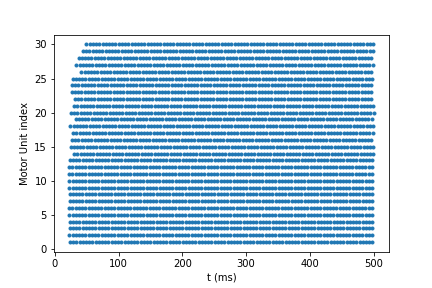

In [28]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1] + 1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')
plt.show()

<IPython.core.display.Javascript object>


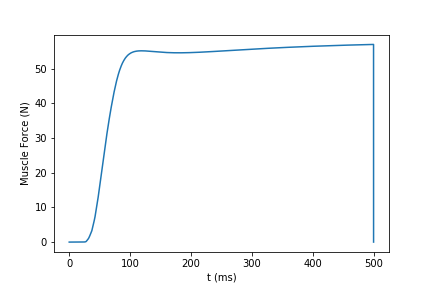

In [25]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Force (N)')
plt.show()

In [26]:
pools[0].getMotorUnitPoolEMG()

<IPython.core.display.Javascript object>


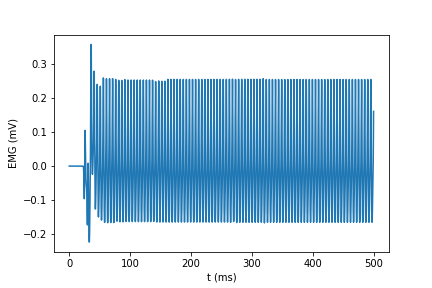

Text(0,0.5,'EMG (mV)')

In [27]:
plt.figure()
plt.plot(t, pools[0].emg, '-')
plt.xlabel('t (ms)')
plt.ylabel('EMG (mV)')